In [10]:
'''
Storytelling Introduction
Imagine you’re a bright-eyed student from Dhaka, dreaming of the cobblestone streets of Munich or the sunlit campuses of Melbourne. You’ve heard stories of world-class lectures, bustling student cafés, and the chance to immerse yourself in new cultures. But as excitement builds, a pressing question looms: How much will all this cost?

This notebook follows your journey step by step. You’ll uncover hidden fees, compare tuition from Paris to Perth, and learn to forecast living expenses with confidence. By the end, you’ll have more than numbers—you’ll have a clear roadmap to plan your dream study-abroad adventure.

You’ve just received your university acceptance letter, and visions of cobblestone streets or sun-drenched campuses fill your mind. But excitement soon gives way to pressing questions: What will my true costs be? How do I secure a visa? Which documents matter most? This notebook guides you—like a seasoned mentor—from budget forecasting to touchdown in your new home.

*** Dataset Overview Dataset Overview
Source: Aggregated from UNESCO, OECD, Mercer, Numbeo, government portals, ISO insurance plans, and OANDA APIs
Columns: Country, City, University, Program, Level, Duration_Years, Tuition_USD, Living_Cost_Index, Rent_USD, Visa_Fee_USD, Insurance_USD, Exchange_Rate

*** Pre-departure Planning
1. Essential Documents

Passport & Validity: Ensure ≥6 months validity beyond arrival date.
Acceptance Letter & I-20/DS-2019: Hand-carry originals; verify spelling & signatures.
Visa Appointment Confirmation: Book 2–4 months in advance.
Health Records & Insurance: Obtain required immunizations; purchase a plan covering at least $100,000 USD.
2. Packing & Logistics

Local SIM/prepaid plan
Emergency contacts & campus liaison numbers
Currency: Carry at least $500 USD in cash; set up a multi-currency card
3. Test Scores & Transcripts

TOEFL/IELTS: minimum scores by university 
GRE/GMAT: required for select graduate programs  ### 3.5 Essays & Recommendations
Craft a Statement of Purpose highlighting fit and goals 
Obtain 2–3 strong letters; request 1–2 months ahead
4. Cultural Adaptation & Well-being

Pre-Departure Orientation: Join alumni panels, virtual campus tours.
Language & Social Clubs: Enroll in conversational classes; attend international student mixers.
Mental Health Resources: Identify campus counseling services; schedule check-ins.
5. Post-arrival Tips

Banking: Open local account within first week; compare student-friendly banks.
Transport: Buy monthly transit passes; consider cycling if safety allows.
Networking: Attend career fairs, join LinkedIn groups, leverage alumni networks.
'''

'\nStorytelling Introduction\nImagine you’re a bright-eyed student from Dhaka, dreaming of the cobblestone streets of Munich or the sunlit campuses of Melbourne. You’ve heard stories of world-class lectures, bustling student cafés, and the chance to immerse yourself in new cultures. But as excitement builds, a pressing question looms: How much will all this cost?\n\nThis notebook follows your journey step by step. You’ll uncover hidden fees, compare tuition from Paris to Perth, and learn to forecast living expenses with confidence. By the end, you’ll have more than numbers—you’ll have a clear roadmap to plan your dream study-abroad adventure.\n\nYou’ve just received your university acceptance letter, and visions of cobblestone streets or sun-drenched campuses fill your mind. But excitement soon gives way to pressing questions: What will my true costs be? How do I secure a visa? Which documents matter most? This notebook guides you—like a seasoned mentor—from budget forecasting to touch

In [12]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Import libraries for data analysis and visualization
import pandas as pd         # Data manipulation
import numpy as np          # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns      # Statistical data visualization
from scipy.stats import linregress     # Linear regression analysis
import geopandas as gpd     # Geographic data handling

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('International_Education_Costs.csv')
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [18]:
cost_cols = ['Tuition_USD','Living_Cost_Index','Rent_USD','Visa_Fee_USD','Insurance_USD']
df = df.dropna(subset=cost_cols)
df = df[(df[cost_cols] != 0).all(axis=1)]

In [20]:
# Average tuition by country
avg_tuition = df.groupby('Country')['Tuition_USD'].mean().sort_values(ascending=False)
avg_tuition.head()

Country
USA          47742.307692
Australia    34610.465116
Singapore    34172.222222
UK           30341.935484
Canada       29456.578947
Name: Tuition_USD, dtype: float64

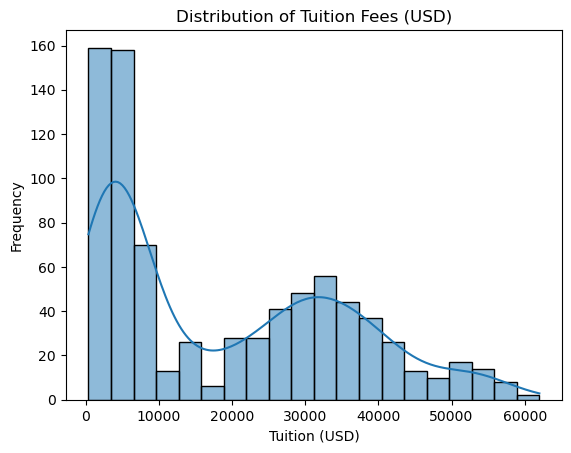

In [22]:
# Distribution of Tuition Fees
sns.histplot(df['Tuition_USD'], bins=20, kde=True)
plt.title('Distribution of Tuition Fees (USD)')
plt.xlabel('Tuition (USD)')
plt.ylabel('Frequency')
plt.show()

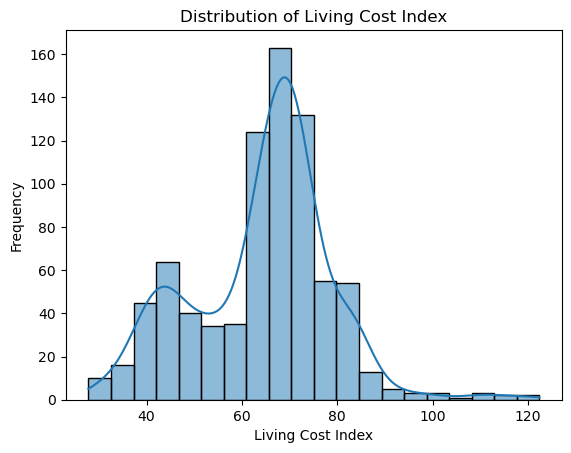

In [24]:
# Distribution of Living Cost Index
sns.histplot(df['Living_Cost_Index'], bins=20, kde=True)
plt.title('Distribution of Living Cost Index')
plt.xlabel('Living Cost Index')
plt.ylabel('Frequency')
plt.show()

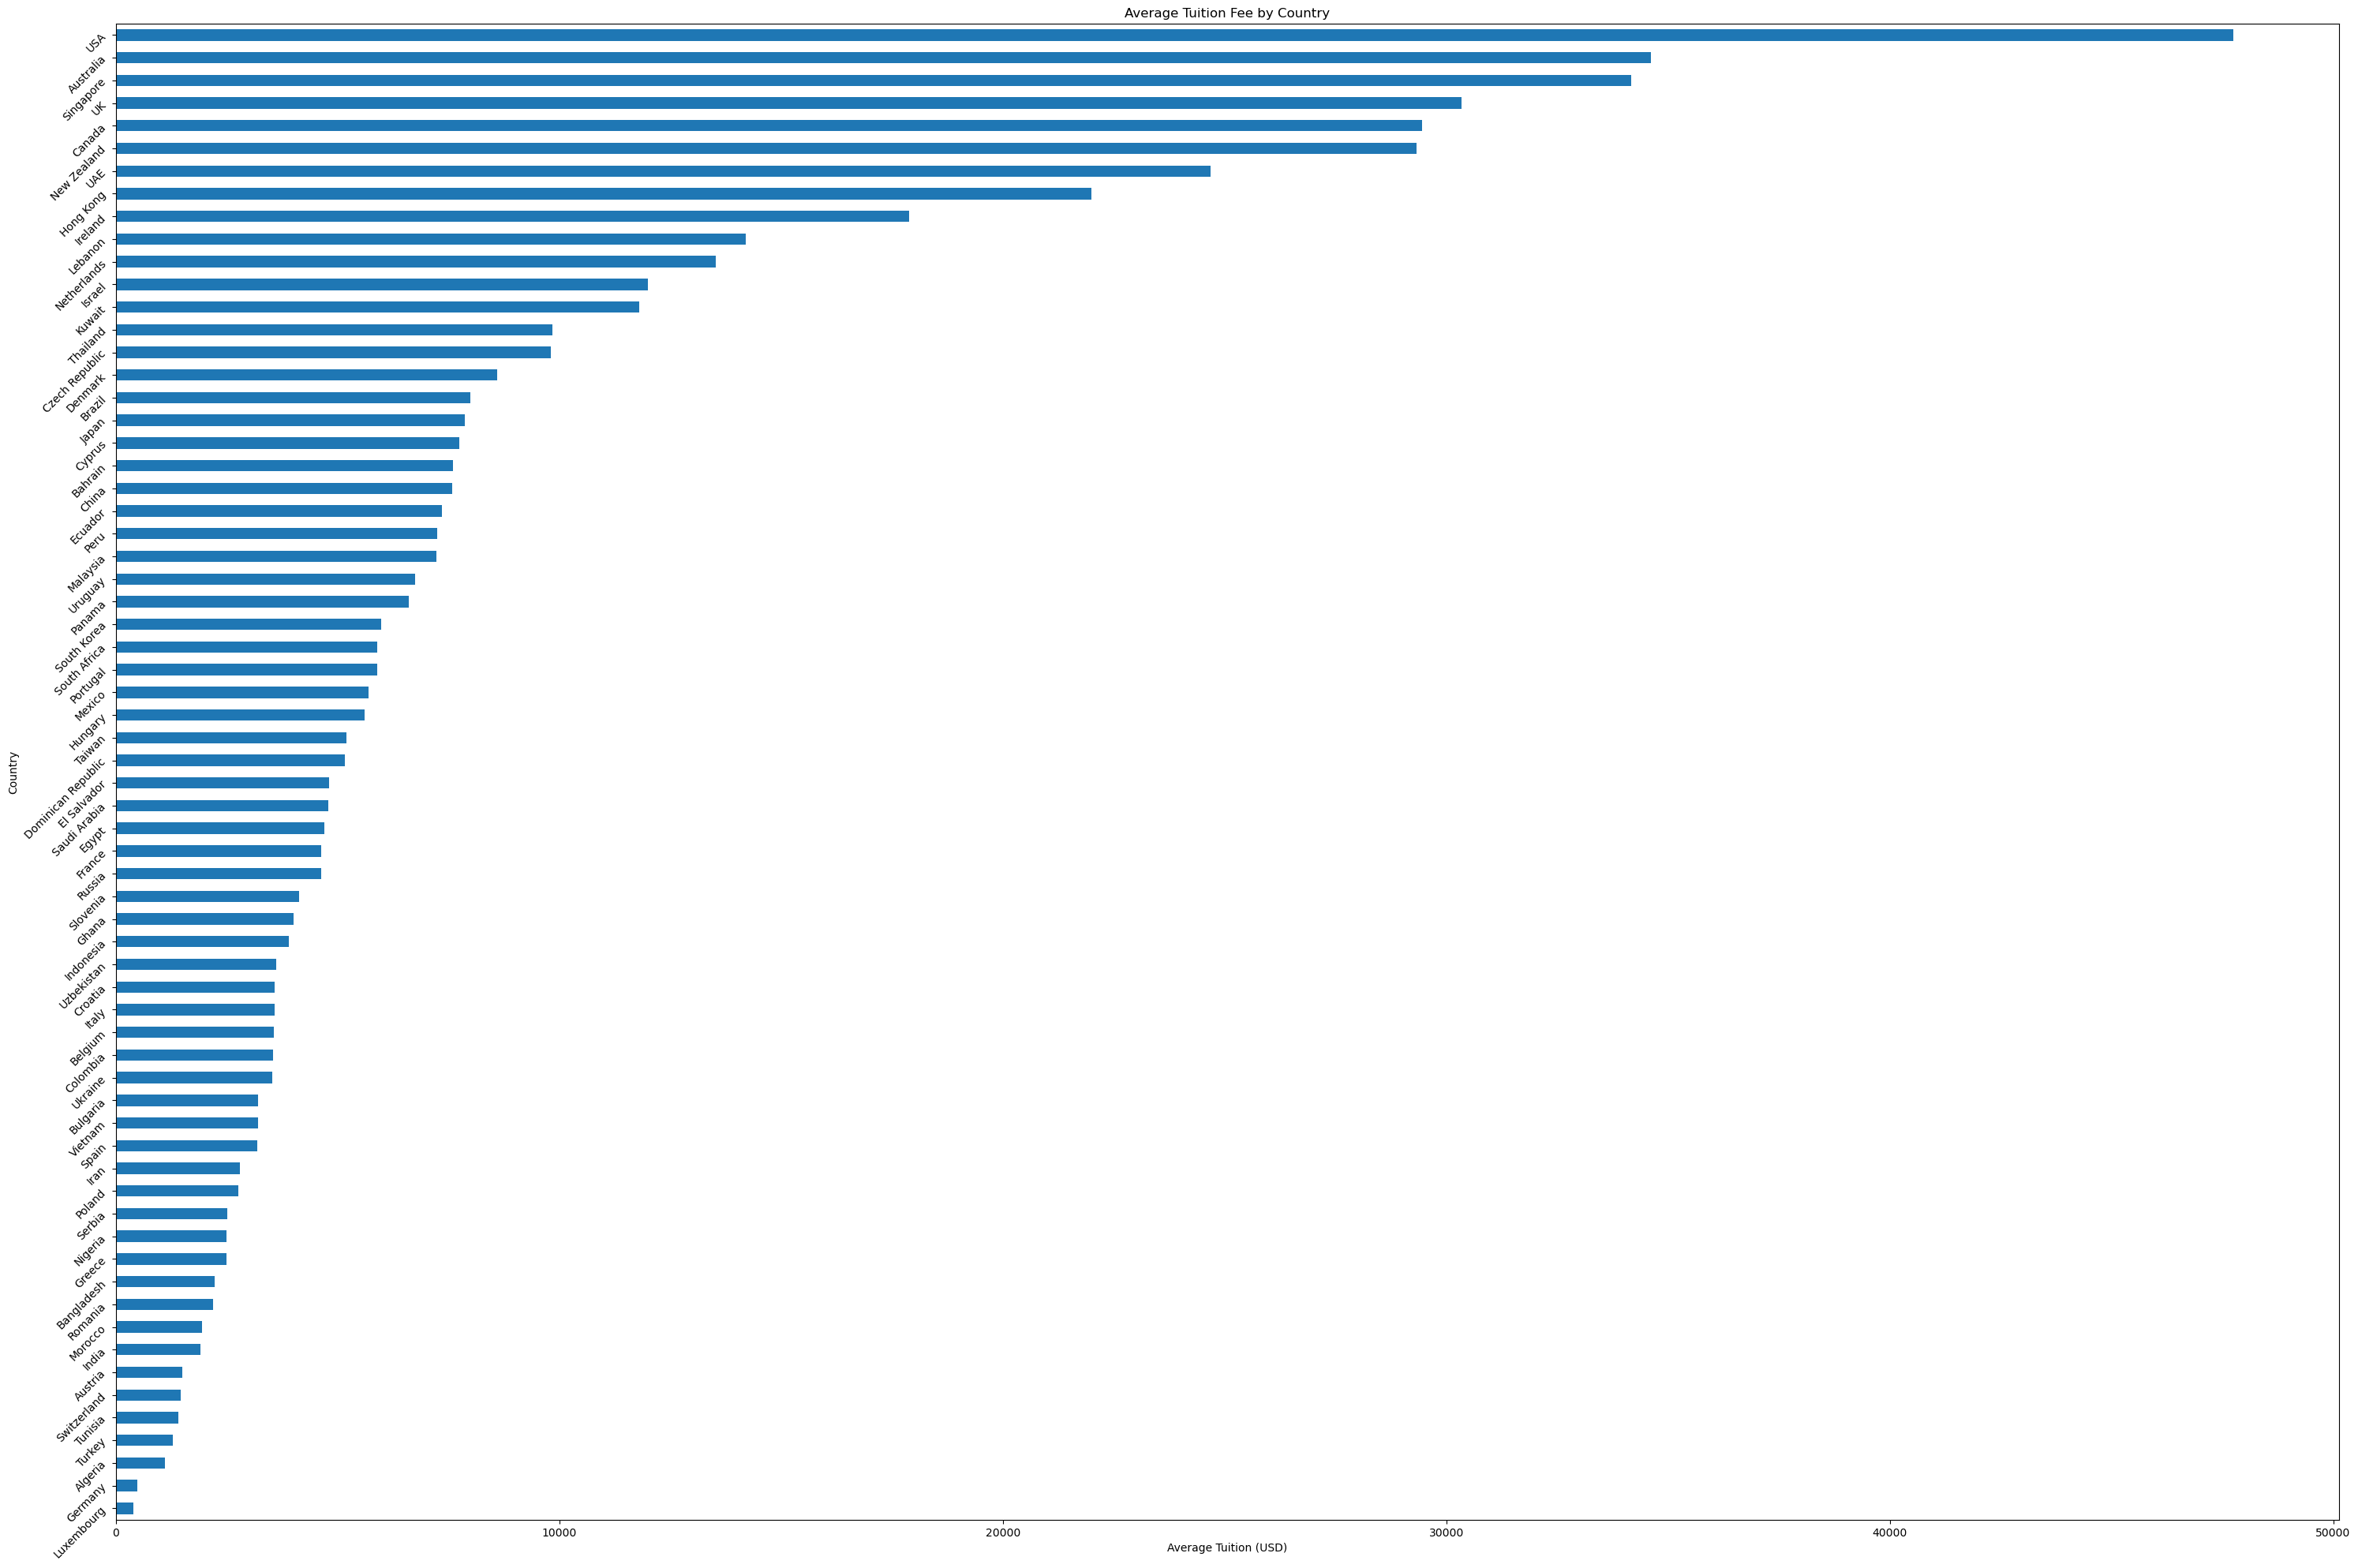

In [26]:
# Average Tuition Fee by Country
# Larger figure size for maximum clarity
plt.figure(figsize=(30, 20))
avg_tuition_county = df.groupby('Country')['Tuition_USD'].mean().sort_values()

# Plot with the larger figure size
avg_tuition_county.plot(kind='barh', figsize=(30, 20))
plt.title('Average Tuition Fee by Country')
plt.xlabel('Average Tuition (USD)')
plt.ylabel('Country')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

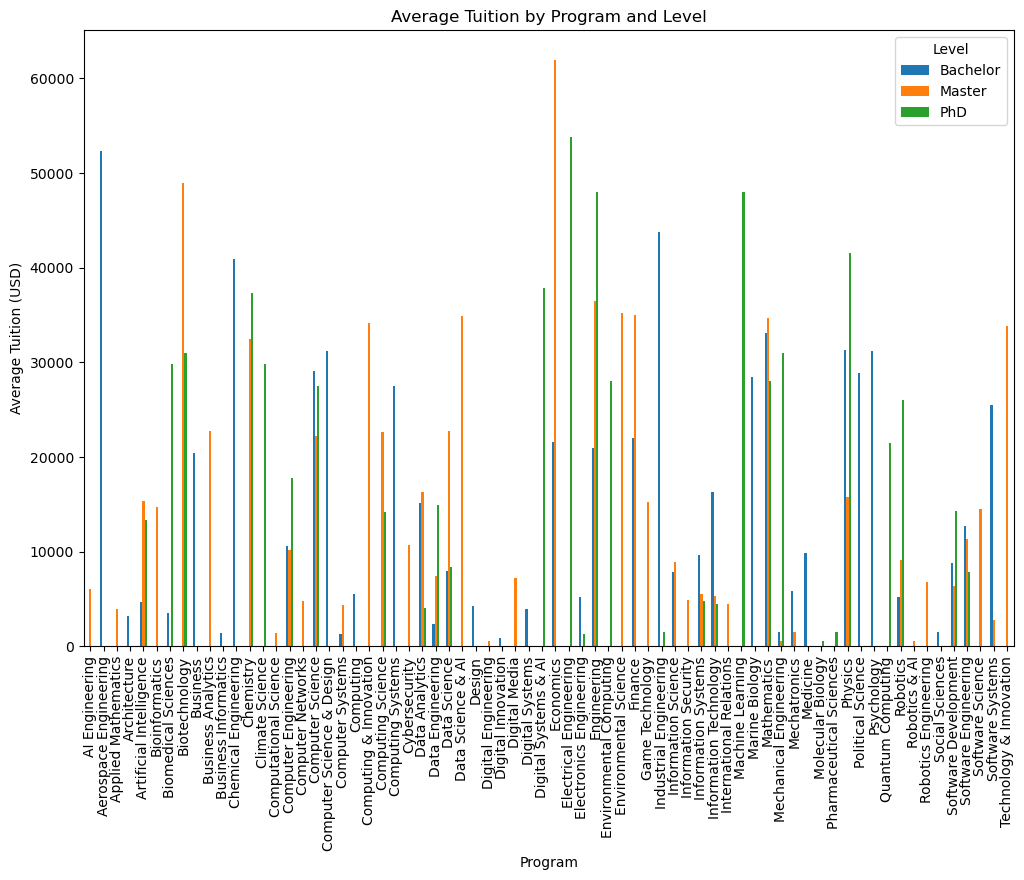

In [28]:
# Average Tuition by Program and Level (Grouped Bar Plot)
avg_tuition = df.groupby(['Program', 'Level'])['Tuition_USD'].mean().unstack()
avg_tuition.plot(kind='bar', figsize=(12,8))
plt.title('Average Tuition by Program and Level')
plt.xlabel('Program')
plt.ylabel('Average Tuition (USD)')
plt.legend(title='Level')
plt.show()

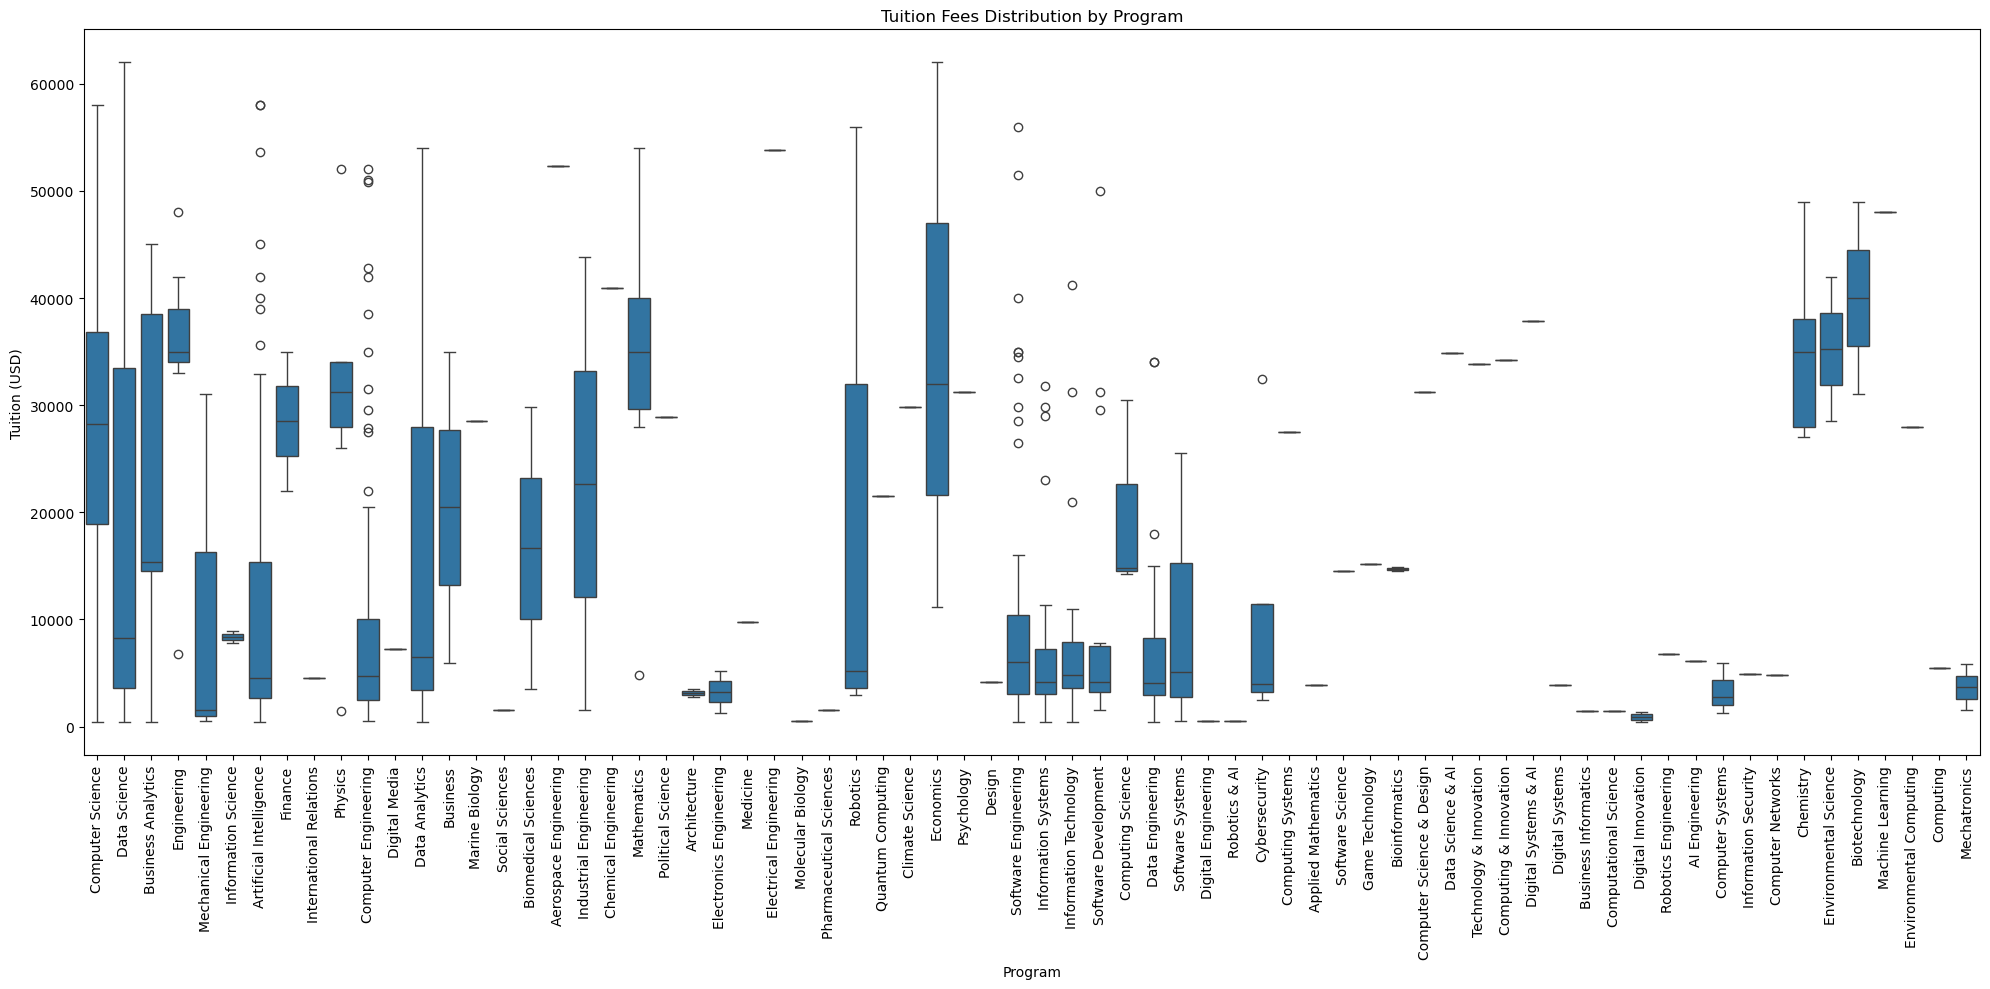

In [30]:
# Boxplot of Tuition Fees for Different Programs
plt.figure(figsize=(20, 10))  # Increase figure size for better clarity
sns.boxplot(x='Program', y='Tuition_USD', data=df)
plt.title('Tuition Fees Distribution by Program')
plt.xlabel('Program')
plt.ylabel('Tuition (USD)')
plt.xticks(rotation=90)  # Rotate labels vertically
plt.tight_layout()  # Ensure layout fits into the figure area
plt.show()

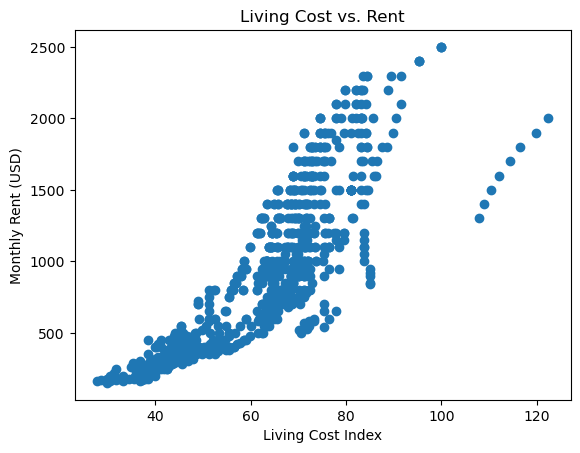

In [32]:
# Living vs. Rent Costs
plt.scatter(df['Living_Cost_Index'], df['Rent_USD'])
plt.xlabel('Living Cost Index')
plt.ylabel('Monthly Rent (USD)')
plt.title('Living Cost vs. Rent')
plt.show()

In [34]:
def estimate_annual_cost(row):
    tuition = row['Tuition_USD'] / row['Duration_Years']
    living = row['Living_Cost_Index'] / 100 * 12000  # baseline $12k/year
    rent = row['Rent_USD'] * 12
    visa = row['Visa_Fee_USD']
    insurance = row['Insurance_USD']
    return tuition + living + rent + visa + insurance

# Apply to dataset

df['Estimated_Annual_Cost'] = df.apply(estimate_annual_cost, axis=1)
df[['University', 'Estimated_Annual_Cost']].sort_values(by='Estimated_Annual_Cost').head()

,University,Estimated_Annual_Cost
762,University of Carthage,6036.0
679,Mansoura University,6260.0
805,University of Tlemcen,6484.0
685,Aswan University,6506.0
748,University of Monastir,6516.0


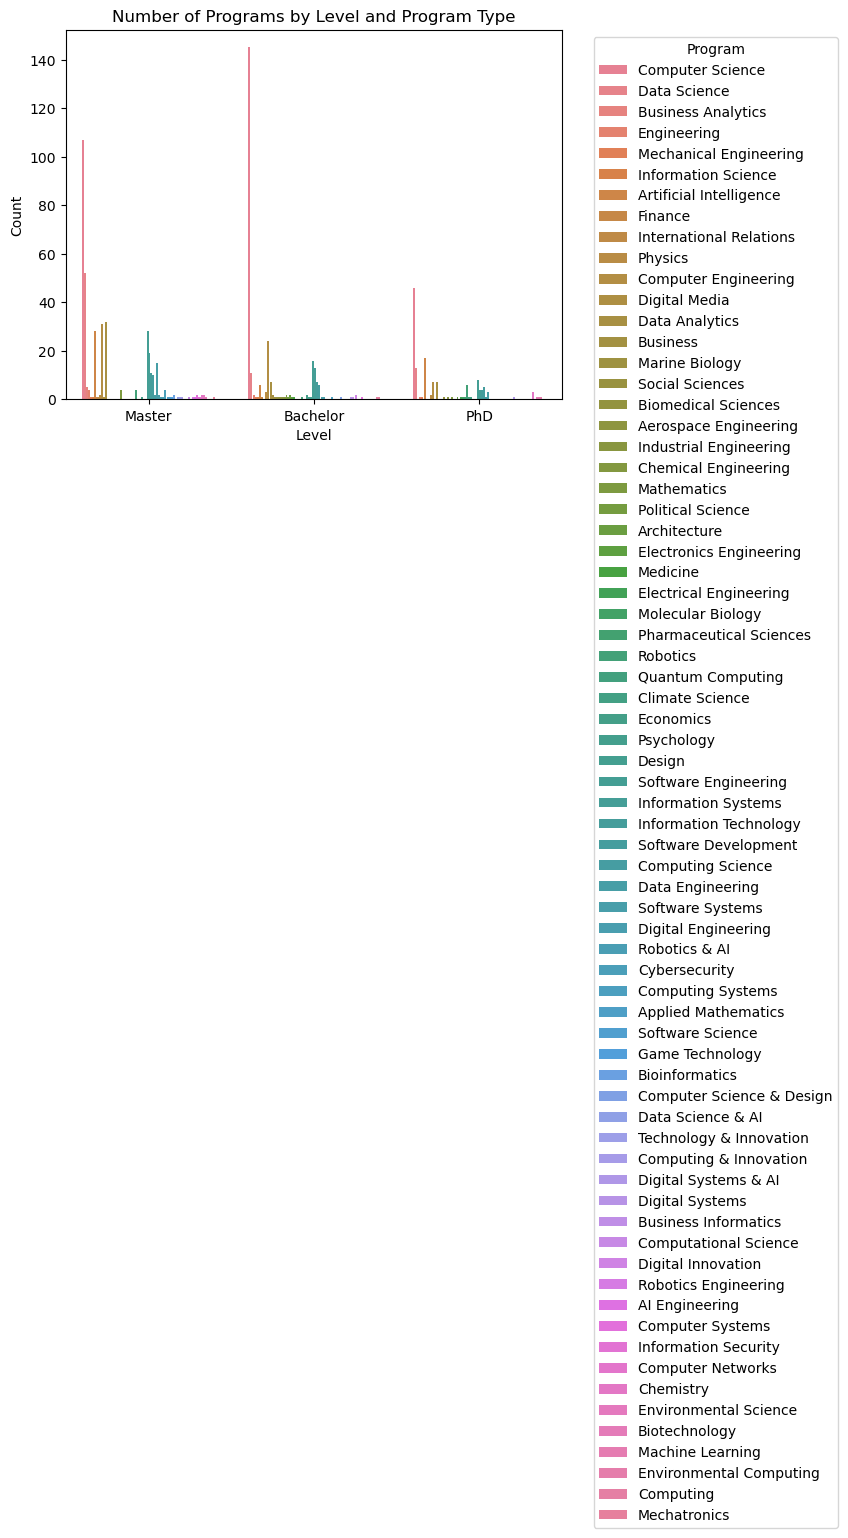

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your original plot
sns.countplot(x='Level', hue='Program', data=df)

# Titles and labels
plt.title('Number of Programs by Level and Program Type')
plt.xlabel('Level')
plt.ylabel('Count')

# Move the legend to the right
plt.legend(title='Program', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ensure layout doesn't clip legend
plt.tight_layout()

# Show the plot
plt.show()


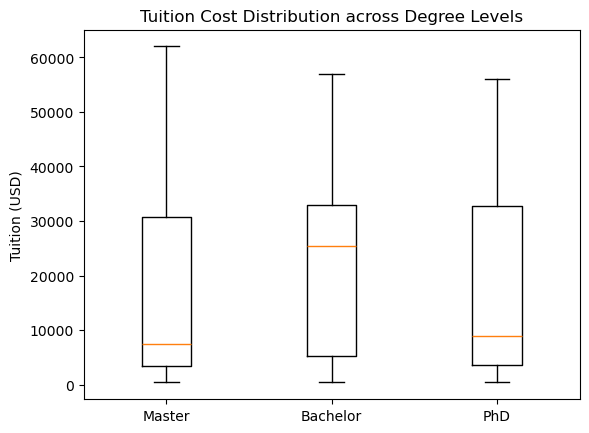

In [40]:
# Tuition Distribution by Degree Level
levels = df['Level'].unique()

data = [df[df['Level']==lvl]['Tuition_USD'] for lvl in levels]

plt.boxplot(data, labels=levels)
plt.ylabel('Tuition (USD)')
plt.title('Tuition Cost Distribution across Degree Levels')
plt.show()

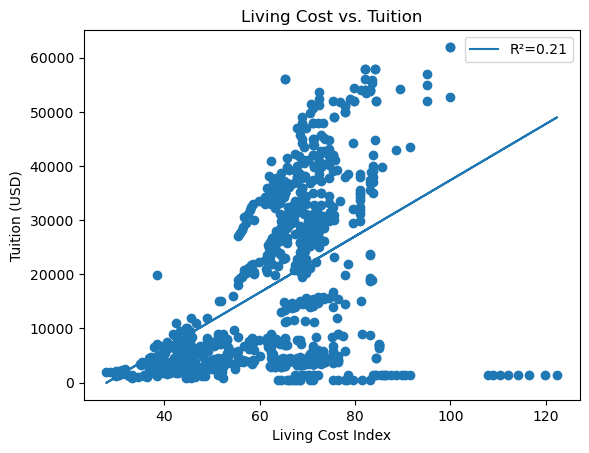

In [42]:
# Living Cost vs. Tuition Scatter with Regression
x = df['Living_Cost_Index']
y = df['Tuition_USD']

slope, intercept, r, p, stderr = linregress(x, y)

plt.scatter(x, y)
plt.plot(x, intercept + slope*x, label=f"R²={r**2:.2f}")
plt.xlabel('Living Cost Index')
plt.ylabel('Tuition (USD)')
plt.title('Living Cost vs. Tuition')
plt.legend()
plt.show()

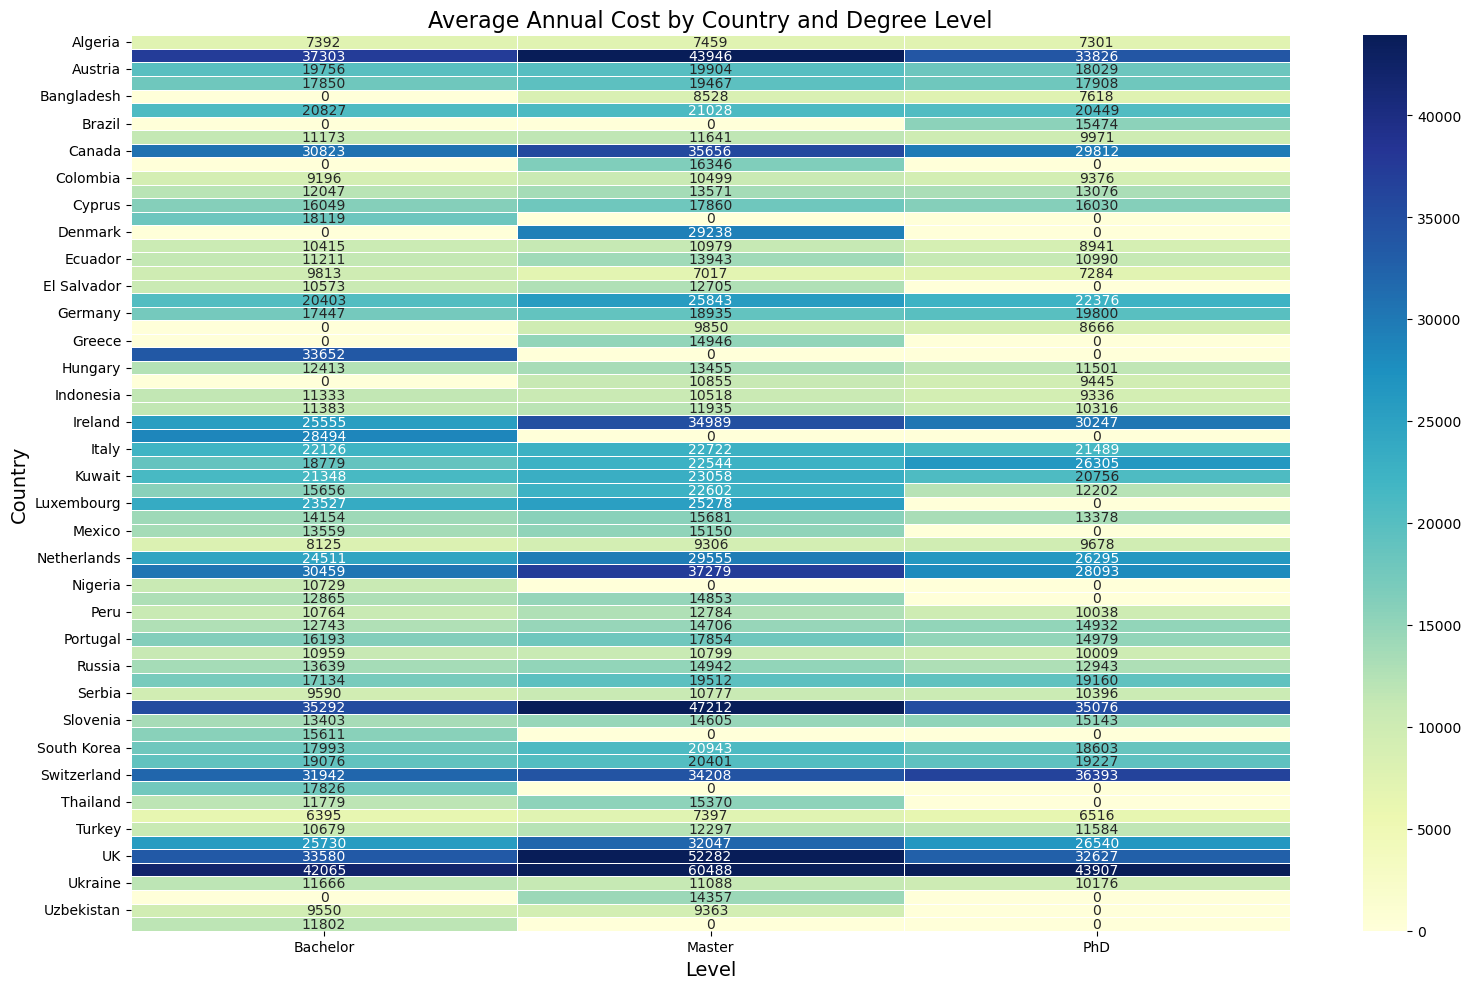

In [44]:
# Heatmap of Average Costs by Country & Level
# pivot table of average estimated cost
pivot = df.pivot_table(
    values='Estimated_Annual_Cost',
    index='Country',
    columns='Level',
    aggfunc='mean'
).fillna(0)
plt.figure(figsize=(16, 10))
sns.heatmap(
    pivot,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    cbar=True,
    linecolor='white',
    linewidths=0.5,
    robust=True
)

plt.title('Average Annual Cost by Country and Degree Level', fontsize=16)
plt.xlabel('Level', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.tight_layout()
plt.show()

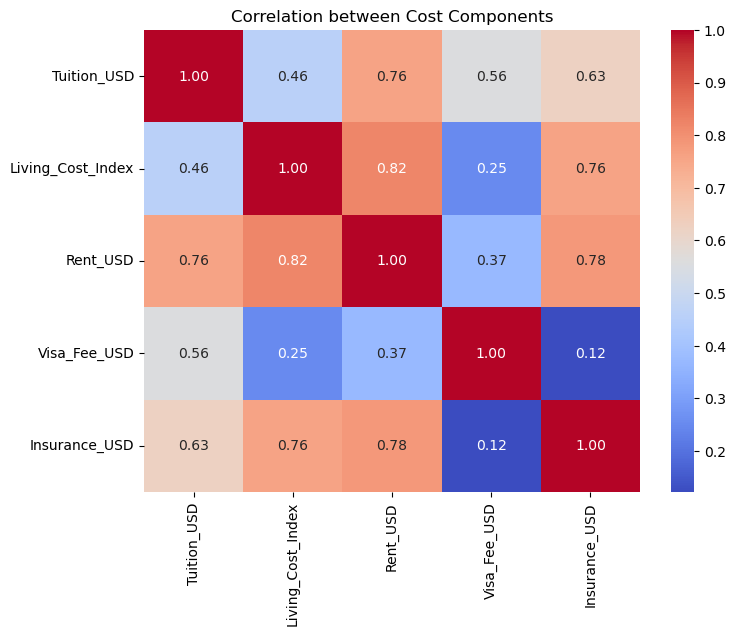

In [46]:
# Correlation Matrix of Cost Components
corr_components = df[['Tuition_USD','Living_Cost_Index','Rent_USD','Visa_Fee_USD','Insurance_USD']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_components, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation between Cost Components')
plt.show()

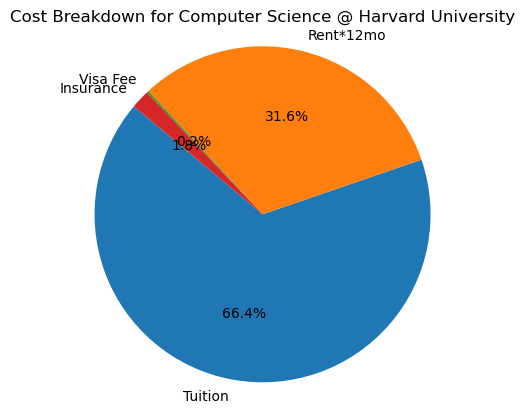

In [56]:
# Pie chart of cost component shares for a sample program
sample = df.loc[0, ['Tuition_USD','Rent_USD','Visa_Fee_USD','Insurance_USD']]
labels = ['Tuition','Rent*12mo','Visa Fee','Insurance']
sizes = [sample['Tuition_USD'], sample['Rent_USD']*12, sample['Visa_Fee_USD'], sample['Insurance_USD']]

import matplotlib.pyplot as plt

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title(f"Cost Breakdown for {df.loc[0,'Program']} @ {df.loc[0,'University']}")
plt.axis('equal')
plt.show()

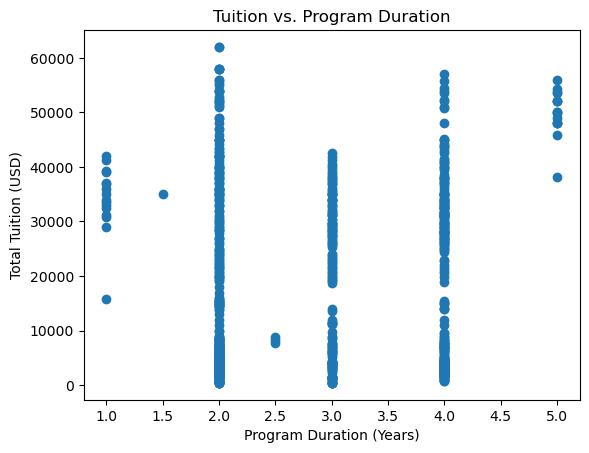

In [58]:
# Scatter plot of Tuition vs. Duration
import matplotlib.pyplot as plt
x = df['Duration_Years']
y = df['Tuition_USD']
plt.scatter(x, y)
plt.xlabel('Program Duration (Years)')
plt.ylabel('Total Tuition (USD)')
plt.title('Tuition vs. Program Duration')
plt.show()